In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('./ddf-data.csv')

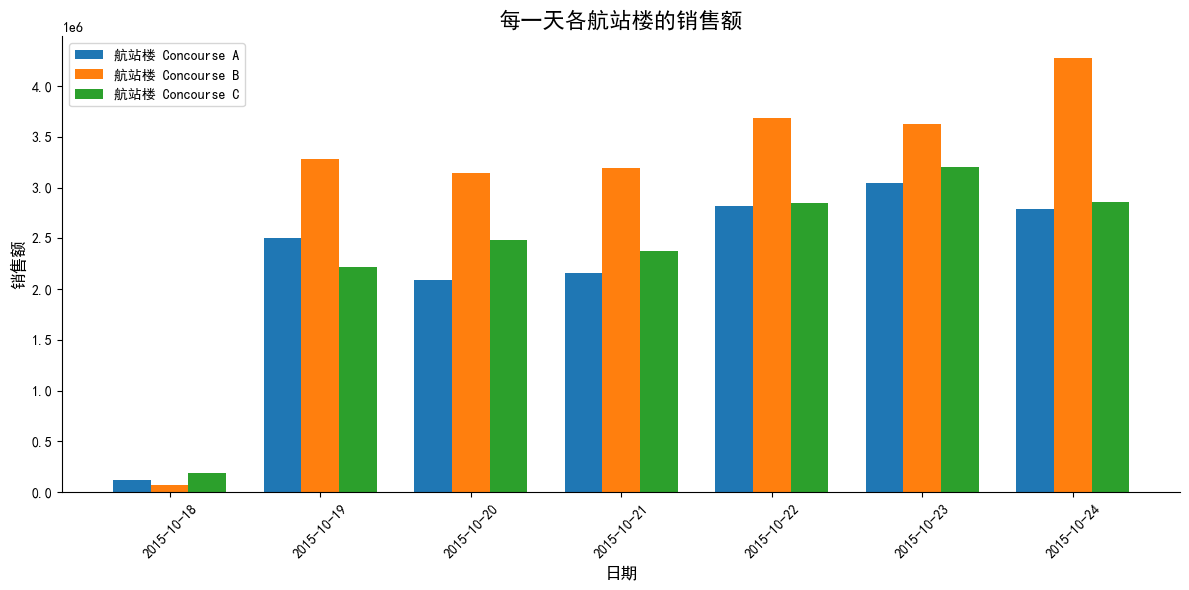

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

df_c1 = df[['trx_datime_c1', 'exp_c1', 'concourse_c1']].copy()
df_c2 = df[['trx_datime_c2', 'exp_c2', 'concourse_c2']].copy()

df_c1['trx_datetime_c1'] = pd.to_datetime(df_c1['trx_datime_c1'], errors='coerce')
df_c2['trx_datetime_c2'] = pd.to_datetime(df_c2['trx_datime_c2'], errors='coerce')

df_c1 = df_c1.dropna(subset=['trx_datetime_c1', 'exp_c1', 'concourse_c1'])
df_c2 = df_c2.dropna(subset=['trx_datetime_c2', 'exp_c2', 'concourse_c2'])

# 提取日期
df_c1['date'] = df_c1['trx_datetime_c1'].dt.date
df_c2['date'] = df_c2['trx_datetime_c2'].dt.date

df_c1.rename(columns={'exp_c1': 'sales', 'concourse_c1': 'concourse'}, inplace=True)
df_c2.rename(columns={'exp_c2': 'sales', 'concourse_c2': 'concourse'}, inplace=True)
df_c1 = df_c1[['date', 'concourse', 'sales']]
df_c2 = df_c2[['date', 'concourse', 'sales']]
df_purchases = pd.concat([df_c1, df_c2], ignore_index=True)

df_purchases['sales'] = pd.to_numeric(df_purchases['sales'], errors='coerce')
df_purchases = df_purchases.dropna(subset=['sales'])

sales_by_date_concourse = df_purchases.groupby(['date', 'concourse'])['sales'].sum().reset_index()
sales_pivot = sales_by_date_concourse.pivot(index='date', columns='concourse', values='sales').fillna(0)

sales_pivot.reset_index(inplace=True)
concourses = sorted(df_purchases['concourse'].unique())
plt.figure(figsize=(12, 6))
bar_width = 0.25
dates = sales_pivot['date']
x = np.arange(len(dates))

for i, concourse in enumerate(concourses):
    plt.bar(x + i * bar_width, sales_pivot[concourse], width=bar_width, label=f'航站楼 {concourse}')
plt.xlabel('日期', fontsize=12)
plt.ylabel('销售额', fontsize=12)
plt.title('每一天各航站楼的销售额', fontsize=16)
plt.xticks(x + bar_width, [date.strftime('%Y-%m-%d') for date in dates], rotation=45)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  # x轴
ax.spines['left'].set_color('black')    # y轴
ax.spines['top'].set_color('none')      # 上边框不显示
ax.spines['right'].set_color('none')    # 右边框不显示
plt.legend()
plt.tight_layout()
plt.show()


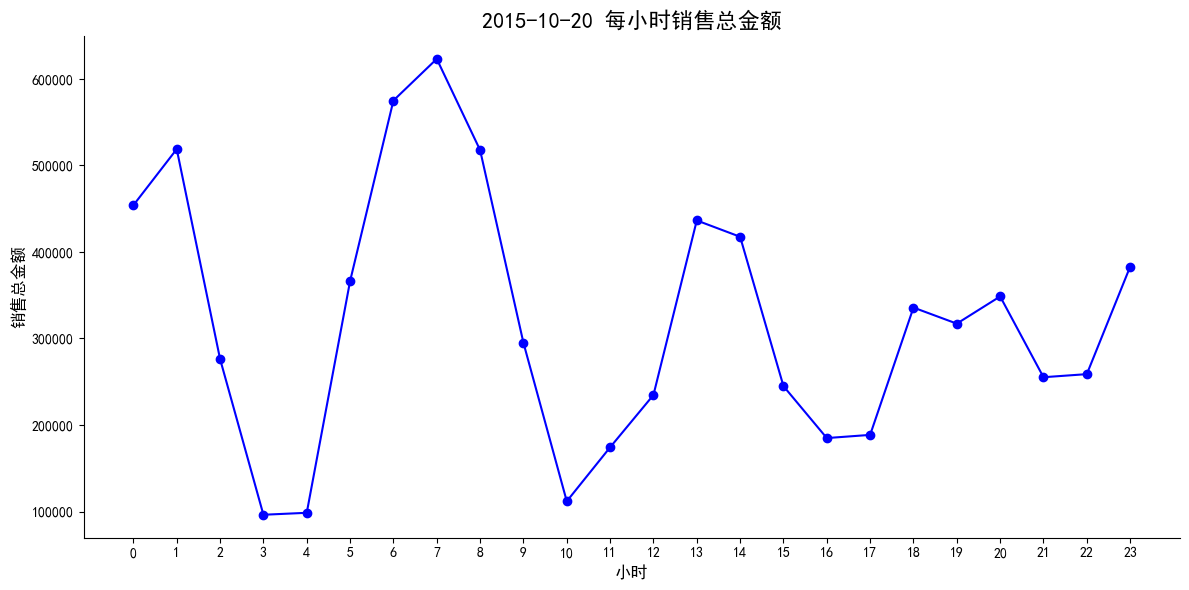

In [15]:
# 设置字体为 SimHei（黑体），以支持中文显示；设置文字颜色为黑色
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.color'] = 'black'  # 设置文字颜色为黑色
plt.rcParams['axes.labelcolor'] = 'black'  # 坐标轴标签颜色
plt.rcParams['xtick.color'] = 'black'  # x轴刻度标签颜色
plt.rcParams['ytick.color'] = 'black'  # y轴刻度标签颜色
plt.rcParams['axes.edgecolor'] = 'black'  # 坐标轴边缘颜色
df_c1 = df[['trx_datime_c1', 'exp_c1']].dropna(subset=['trx_datime_c1', 'exp_c1'])
df_c2 = df[['trx_datime_c2', 'exp_c2']].dropna(subset=['trx_datime_c2', 'exp_c2'])
df_c1['trx_datime_c1_orig'] = df_c1['trx_datime_c1']
df_c2['trx_datime_c2_orig'] = df_c2['trx_datime_c2']
df_c1['trx_datime_c1'] = df_c1['trx_datime_c1_orig']
df_c2['trx_datime_c2'] = df_c2['trx_datime_c2_orig']
df_c1['trx_datime_c1'] = df_c1['trx_datime_c1'].astype(str).str.strip()
df_c2['trx_datime_c2'] = df_c2['trx_datime_c2'].astype(str).str.strip()
df_c1['date_str'] = df_c1['trx_datime_c1'].str.slice(0, 10)
df_c2['date_str'] = df_c2['trx_datime_c2'].str.slice(0, 10)
df_c1['hour_str'] = df_c1['trx_datime_c1'].str.slice(11, 13)
df_c2['hour_str'] = df_c2['trx_datime_c2'].str.slice(11, 13)
df_c1['date'] = pd.to_datetime(df_c1['date_str'], format='%Y-%m-%d', errors='coerce').dt.date
df_c2['date'] = pd.to_datetime(df_c2['date_str'], format='%Y-%m-%d', errors='coerce').dt.date
df_c1['hour'] = pd.to_numeric(df_c1['hour_str'], errors='coerce')
df_c2['hour'] = pd.to_numeric(df_c2['hour_str'], errors='coerce')
df_c1 = df_c1.dropna(subset=['date', 'hour', 'exp_c1'])
df_c2 = df_c2.dropna(subset=['date', 'hour', 'exp_c2'])
df_c1['exp_c1'] = pd.to_numeric(df_c1['exp_c1'], errors='coerce')
df_c2['exp_c2'] = pd.to_numeric(df_c2['exp_c2'], errors='coerce')
df_c1 = df_c1.dropna(subset=['exp_c1'])
df_c2 = df_c2.dropna(subset=['exp_c2'])
target_date = pd.to_datetime('2015-10-20').date()
df_c1 = df_c1[df_c1['date'] == target_date]
df_c2 = df_c2[df_c2['date'] == target_date]
sales_c1 = df_c1.groupby('hour')['exp_c1'].sum().reset_index()
sales_c2 = df_c2.groupby('hour')['exp_c2'].sum().reset_index()
sales_c1.rename(columns={'exp_c1': 'sales'}, inplace=True)
sales_c2.rename(columns={'exp_c2': 'sales'}, inplace=True)
total_sales = pd.concat([sales_c1, sales_c2], ignore_index=True)
total_sales = total_sales.groupby('hour')['sales'].sum().reset_index()
all_hours = pd.DataFrame({'hour': range(24)})
total_sales = pd.merge(all_hours, total_sales, on='hour', how='left').fillna(0)
total_sales = total_sales.sort_values('hour')
# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(total_sales['hour'], total_sales['sales'], marker='o', color='blue', linestyle='-')

plt.xlabel('小时', fontsize=12)
plt.ylabel('销售总金额', fontsize=12)
plt.title('2015-10-20 每小时销售总金额', fontsize=16)
plt.xticks(range(0, 24))
plt.grid(False)
ax = plt.gca()
ax.spines['bottom'].set_color('black')  # x轴
ax.spines['left'].set_color('black')    # y轴
ax.spines['top'].set_color('none')      # 上边框不显示
ax.spines['right'].set_color('none')    # 右边框不显示
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_24596\176538161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['exp_c1'] = pd.to_numeric(df_purchase['exp_c1'], errors='coerce')
C:\Users\dell\AppData\Local\Temp\ipykernel_24596\176538161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['exp_c2'] = pd.to_numeric(df_purchase['exp_c2'], errors='coerce')


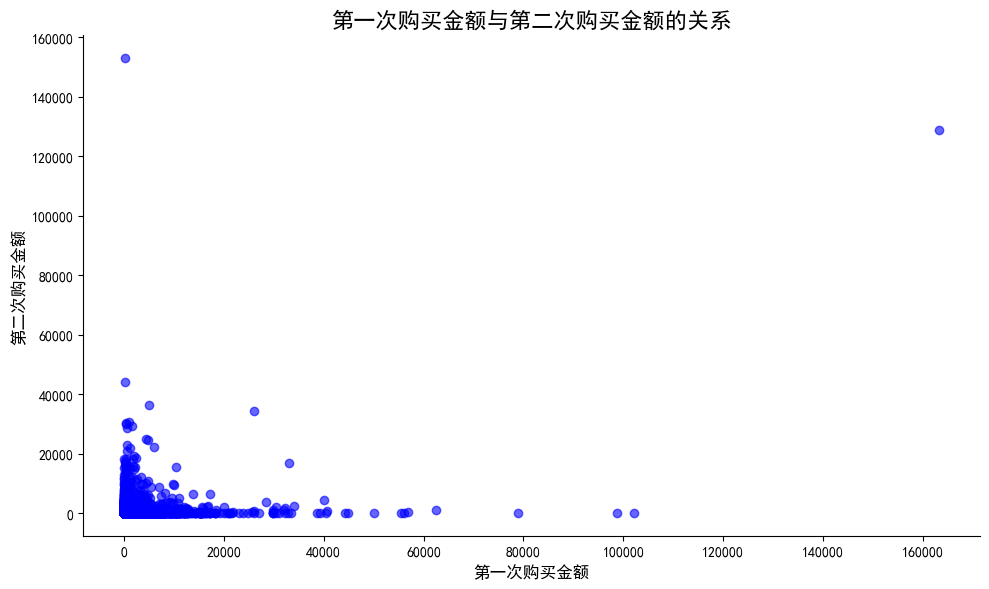

In [16]:
plt.rcParams['axes.unicode_minus'] = False
df_purchase = df[['exp_c1', 'exp_c2']]
df_purchase['exp_c1'] = pd.to_numeric(df_purchase['exp_c1'], errors='coerce')
df_purchase['exp_c2'] = pd.to_numeric(df_purchase['exp_c2'], errors='coerce')
df_purchase = df_purchase.dropna(subset=['exp_c1', 'exp_c2'])
plt.figure(figsize=(10, 6))
plt.scatter(df_purchase['exp_c1'], df_purchase['exp_c2'], color='blue', alpha=0.6)
plt.xlabel('第一次购买金额', fontsize=12)
plt.ylabel('第二次购买金额', fontsize=12)
plt.title('第一次购买金额与第二次购买金额的关系', fontsize=16)
plt.grid(False)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black') 
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')  
plt.tight_layout()
plt.show()